In [134]:
import pandas as pd
import seaborn as sns

In [105]:
df = pd.read_csv('earthquake_catalog_1980_2023.csv')
df.head()

Unnamed: 0  #YYY/MM/DD  HH:mm:SS.ss  ET GT   MAG  M     LAT      LON  \
0           0  1980/01/01  00:05:01.21  eq  l  1.80  h  33.723 -118.854   
1           1  1980/01/01  00:05:54.16  eq  l  2.40  h  33.727 -118.811   
2           2  1980/01/01  01:53:06.21  eq  l  1.60  h  33.093 -116.077   
3           3  1980/01/01  02:09:20.62  eq  r  3.10  h  36.522 -121.143   
4           4  1980/01/01  02:29:13.71  eq  l  1.80  h  36.455 -117.934   

   DEPTH  Q        EVID   NPH   NGRM  
0    6.0  C  12277543.0  12.0  164.0  
1    0.2  A   3301488.0  27.0  164.0  
2    6.0  C   3301492.0  22.0  164.0  
3    6.0  D   3325141.0   8.0   97.0  
4    6.4  D   3301493.0   7.0  164.0

Remove invalid date-time rows

In [106]:
df[df['HH:mm:SS.ss']=='Number'].head()

Unnamed: 0 #YYY/MM/DD HH:mm:SS.ss  ET    GT             MAG    M  LAT  \
5598         5598        ###      Number  of  rows   returned:5598  NaN  NaN   
16283       10684        ###      Number  of  rows  returned:10684  NaN  NaN   
30311       14027        ###      Number  of  rows  returned:14027  NaN  NaN   
44776       14464        ###      Number  of  rows  returned:14464  NaN  NaN   
62666       17889        ###      Number  of  rows  returned:17889  NaN  NaN   

       LON  DEPTH    Q  EVID  NPH  NGRM  
5598   NaN    NaN  NaN   NaN  NaN   NaN  
16283  NaN    NaN  NaN   NaN  NaN   NaN  
30311  NaN    NaN  NaN   NaN  NaN   NaN  
44776  NaN    NaN  NaN   NaN  NaN   NaN  
62666  NaN    NaN  NaN   NaN  NaN   NaN

In [107]:
invalid = df[df['HH:mm:SS.ss']=='Number'].index
df.drop(invalid, inplace=True)
df[df['HH:mm:SS.ss']=='Number']

Empty DataFrame
Columns: [Unnamed: 0, #YYY/MM/DD, HH:mm:SS.ss, ET, GT, MAG, M, LAT, LON, DEPTH, Q, EVID, NPH, NGRM]
Index: []

Convert dates to pandas datetime type:
1. combine #YYY/MM/DD HH:mm:SS.ss

In [108]:
#%Y-%m-%d %H:%M:%S.%f
df['Date'] = df['#YYY/MM/DD'] + ' ' + df['HH:mm:SS.ss']
df.head()

Unnamed: 0  #YYY/MM/DD  HH:mm:SS.ss  ET GT   MAG  M     LAT      LON  \
0           0  1980/01/01  00:05:01.21  eq  l  1.80  h  33.723 -118.854   
1           1  1980/01/01  00:05:54.16  eq  l  2.40  h  33.727 -118.811   
2           2  1980/01/01  01:53:06.21  eq  l  1.60  h  33.093 -116.077   
3           3  1980/01/01  02:09:20.62  eq  r  3.10  h  36.522 -121.143   
4           4  1980/01/01  02:29:13.71  eq  l  1.80  h  36.455 -117.934   

   DEPTH  Q        EVID   NPH   NGRM                    Date  
0    6.0  C  12277543.0  12.0  164.0  1980/01/01 00:05:01.21  
1    0.2  A   3301488.0  27.0  164.0  1980/01/01 00:05:54.16  
2    6.0  C   3301492.0  22.0  164.0  1980/01/01 01:53:06.21  
3    6.0  D   3325141.0   8.0   97.0  1980/01/01 02:09:20.62  
4    6.4  D   3301493.0   7.0  164.0  1980/01/01 02:29:13.71

2. Format to fit pandas datetime directives %Y/%m/%d %H:%M:%S.%f

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [109]:
df[df['Date'].str.contains(':60.')]

Unnamed: 0  #YYY/MM/DD  HH:mm:SS.ss  ET GT   MAG  M     LAT      LON  \
17096          812  1982/02/04  20:12:60.00  qb  l  1.30  n  34.330 -116.950   
20969         4685  1982/05/09  10:21:60.00  eq  l  1.91  c  35.795 -117.747   
21043         4759  1982/05/11  00:33:60.00  eq  l  0.00  n  36.088 -117.720   
37421         7109  1983/07/20  01:39:60.00  eq  r  1.80  n  36.170 -121.530   
38635         8323  1983/08/18  05:47:60.00  eq  l  1.10  n  33.019 -116.346   
55637        10860  1984/08/09  04:48:60.00  eq  l  2.32  c  35.649 -118.453   
67799         5132  1985/04/05  21:21:60.00  eq  l  1.89  c  33.518 -116.787   
77496        14829  1985/10/01  10:20:60.00  eq  l  1.73  c  33.396 -116.955   
85737         4222  1986/04/15  16:06:60.99  eq  l  0.60  n  35.918 -117.903   
116473        4308  1988/05/10  14:52:60.00  eq  r  2.29  c  35.743 -121.454   
129379        6144  1989/07/12  12:03:60.00  eq  l  1.30  n  32.946 -115.813   
145826       11023  1990/12/22  16:22:60.00  eq  l  1.70  h  34.535 -116.805   
145893       11090  1990/12/25  14:19:60.00  eq  l  2.05  c  34.535 -116.829   
147529        1487  1991/02/27  19:03:60.00  qb  l  0.00  n  35.350 -117.650   
176447       20312  1992/07/10  21:48:60.00  eq  l  2.62  c  34.305 -116.431   
213311        5742  1993/04/15  18:53:60.00  eq  l  1.84  c  34.166 -116.769   
227125       19556  1993/11/17  08:23:60.00  eq  l  1.87  c  33.880 -116.847   
230004         421  1994/01/09  06:23:60.00  eq  l  1.48  c  34.587 -116.605   
255752       26169  1994/11/25  00:43:60.00  eq  l  1.54  c  34.034 -117.508   
266414        8576  1995/07/08  15:34:60.00  eq  l  2.05  c  32.598 -117.325   
283524         696  1996/01/08  13:38:60.00  eq  l  1.46  c  35.761 -117.636   
288599        5771  1996/03/26  11:57:60.00  eq  l  1.71  c  34.144 -116.714   
301320       18492  1996/12/09  21:11:60.99  eq  l  1.66  c  35.660 -117.533   
305172        2469  1997/02/22  04:22:60.00  eq  l  0.84  c  36.028 -117.732   
309989        7286  1997/06/04  03:22:60.00  eq  l  1.24  c  33.239 -116.030   
330102       12078  1998/11/10  12:17:60.00  eq  l  1.27  c  32.688 -116.001   
338696        7116  1999/08/14  06:41:60.00  eq  l  2.00  h  32.050 -114.593   
341826       10246  1999/10/17  23:24:60.99  eq  l  2.56  l  34.569 -116.288   
345043       13463  1999/10/28  15:48:60.99  eq  l  1.90  h  34.849 -116.355   
349340       17760  1999/11/25  20:40:60.00  eq  l  1.50  h  34.347 -116.476   

        DEPTH  Q       EVID   NPH   NGRM                    Date  
17096    -1.6  C   105447.0   7.0   10.0  1982/02/04 20:12:60.00  
20969     8.0  C   530414.0  14.0   14.0  1982/05/09 10:21:60.00  
21043     7.8  D   530520.0   8.0    9.0  1982/05/11 00:33:60.00  
37421     5.4  D    10844.0   6.0   12.0  1983/07/20 01:39:60.00  
38635     2.3  B    20080.0   6.0    9.0  1983/08/18 05:47:60.00  
55637     2.3  A    46912.0  40.0   69.0  1984/08/09 04:48:60.00  
67799     0.0  B    63788.0  11.0   28.0  1985/04/05 21:21:60.00  
77496    14.7  A   121395.0  19.0   25.0  1985/10/01 10:20:60.00  
85737     3.1  A   122044.0   9.0   13.0  1986/04/15 16:06:60.99  
116473    5.6  D   639109.0  10.0   19.0  1988/05/10 14:52:60.00  
129379    2.3  A  1034513.0   9.0   20.0  1989/07/12 12:03:60.00  
145826   -0.1  C  2009344.0   8.0   26.0  1990/12/22 16:22:60.00  
145893    0.1  C  2009454.0  16.0   38.0  1990/12/25 14:19:60.00  
147529   -1.0  C   691895.0   8.0   16.0  1991/02/27 19:03:60.00  
176447    0.0  A  3040807.0  41.0  211.0  1992/07/10 21:48:60.00  
213311    6.3  B  3101033.0  40.0  134.0  1993/04/15 18:53:60.00  
227125   14.3  A  3132269.0  39.0  164.0  1993/11/17 08:23:60.00  
230004    4.8  B  3139600.0   9.0   48.0  1994/01/09 06:23:60.00  
255752    2.0  A  3194478.0  36.0  102.0  1994/11/25 00:43:60.00  
266414    5.4  D  3218921.0  15.0   85.0  1995/07/08 15:34:60.00  
283524    4.7  A  3249220.0  21.0   77.0  1996/01/08 13:38:60.00  
288599    7.7  A  3259481.0  36.0  135.0  1996/03/26 

In [110]:
df['#YYY/MM/DD'] = pd.to_datetime(df['#YYY/MM/DD'], format='%Y/%m/%')
df.head()

Unnamed: 0 #YYY/MM/DD  HH:mm:SS.ss  ET GT   MAG  M     LAT      LON  DEPTH  \
0           0 1980-01-01  00:05:01.21  eq  l  1.80  h  33.723 -118.854    6.0   
1           1 1980-01-01  00:05:54.16  eq  l  2.40  h  33.727 -118.811    0.2   
2           2 1980-01-01  01:53:06.21  eq  l  1.60  h  33.093 -116.077    6.0   
3           3 1980-01-01  02:09:20.62  eq  r  3.10  h  36.522 -121.143    6.0   
4           4 1980-01-01  02:29:13.71  eq  l  1.80  h  36.455 -117.934    6.4   

   Q        EVID   NPH   NGRM                    Date  
0  C  12277543.0  12.0  164.0  1980/01/01 00:05:01.21  
1  A   3301488.0  27.0  164.0  1980/01/01 00:05:54.16  
2  C   3301492.0  22.0  164.0  1980/01/01 01:53:06.21  
3  D   3325141.0   8.0   97.0  1980/01/01 02:09:20.62  
4  D   3301493.0   7.0  164.0  1980/01/01 02:29:13.71

Format text as numberic

In [145]:
df['DEPTH'] = df['DEPTH'].astype(float)
df['MAG'] = df['MAG'].astype(float)

In [146]:
df = df.rename(columns={"Unnamed: 0":"rownum"})
df = df.drop('rownum', axis=1)
df.describe()

KeyError: "['rownum'] not found in axis"

In [147]:
df.hist()

array([[<AxesSubplot: title={'center': '#YYY/MM/DD'}>,
        <AxesSubplot: title={'center': 'MAG'}>,
        <AxesSubplot: title={'center': 'LAT'}>],
       [<AxesSubplot: title={'center': 'LON'}>,
        <AxesSubplot: title={'center': 'DEPTH'}>,
        <AxesSubplot: title={'center': 'EVID'}>],
       [<AxesSubplot: title={'center': 'NPH'}>,
        <AxesSubplot: title={'center': 'NGRM'}>, <AxesSubplot: >]],
      dtype=object)

Check included event types
* eq = earthquake
* qb = quarry blast

In [148]:
df['ET'].describe()

count     812749
unique         2
top           eq
freq      771261
Name: ET, dtype: object

In [149]:
print(df['MAG'].describe())
print(df['MAG'].max(), df['MAG'].min())

count    812749.000000
mean          1.386123
std           0.657779
min           0.000000
25%           0.910000
50%           1.330000
75%           1.790000
max           7.300000
Name: MAG, dtype: float64
7.3 0.0


In [154]:
df2 = df[['#YYY/MM/DD', 'MAG']]
df2.head()

#YYY/MM/DD  MAG
0 1980-01-01  1.8
1 1980-01-01  2.4
2 1980-01-01  1.6
3 1980-01-01  3.1
4 1980-01-01  1.8

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Earthquake Magnitudes')

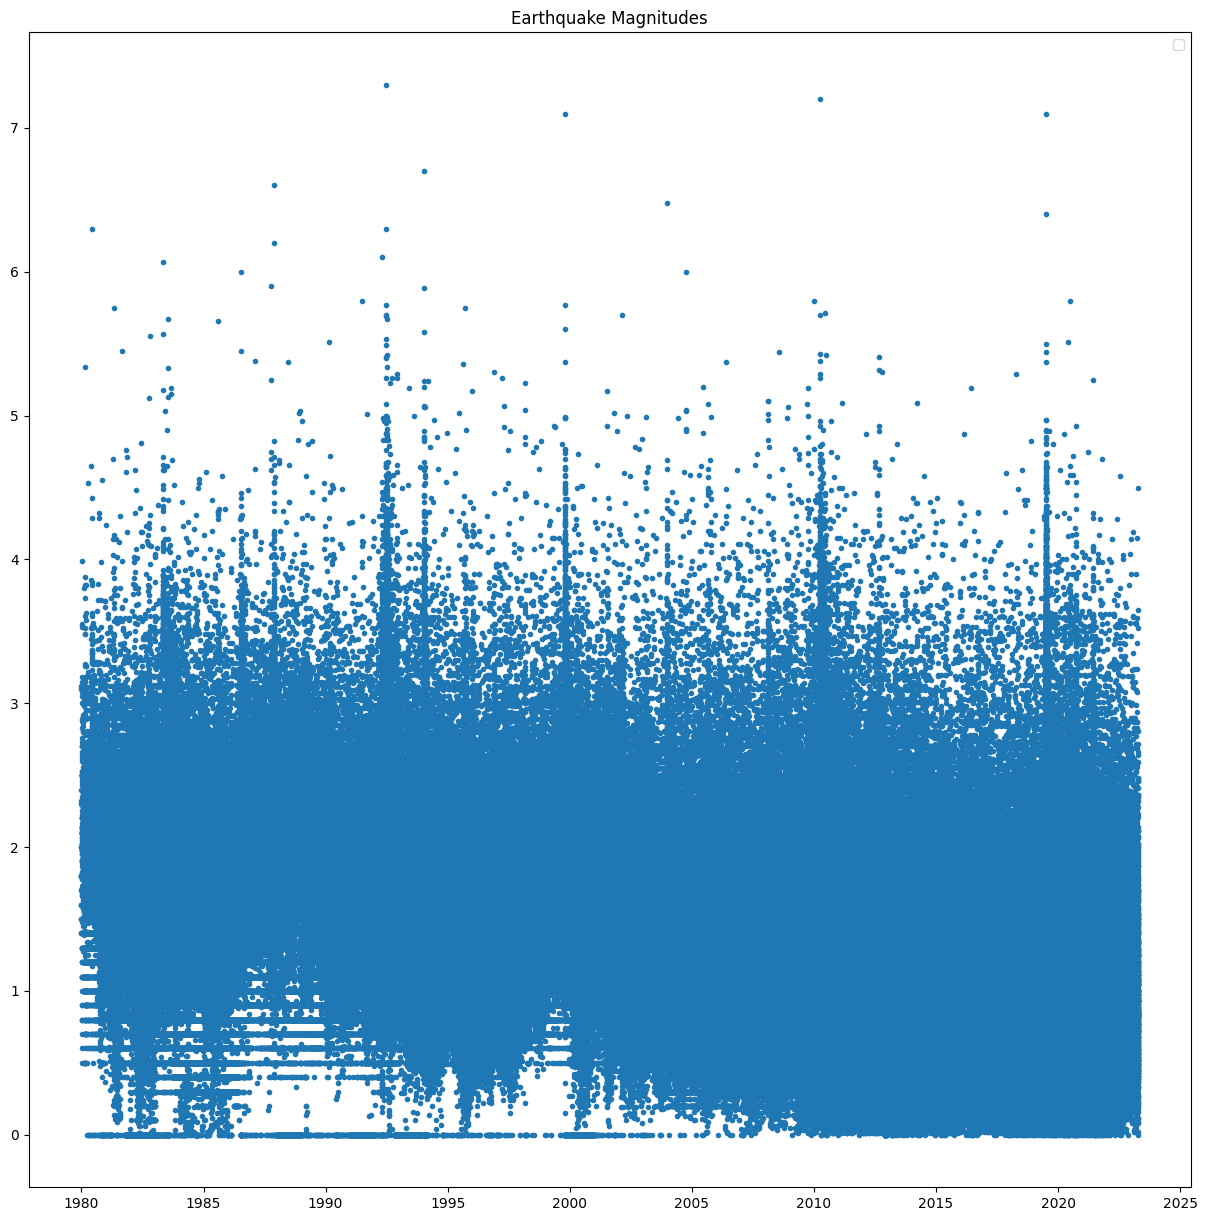

In [164]:
plt.plot(df2['#YYY/MM/DD'],df2['MAG'],'.')
plt.legend()
plt.title("Earthquake Magnitudes")

<AxesSubplot: >

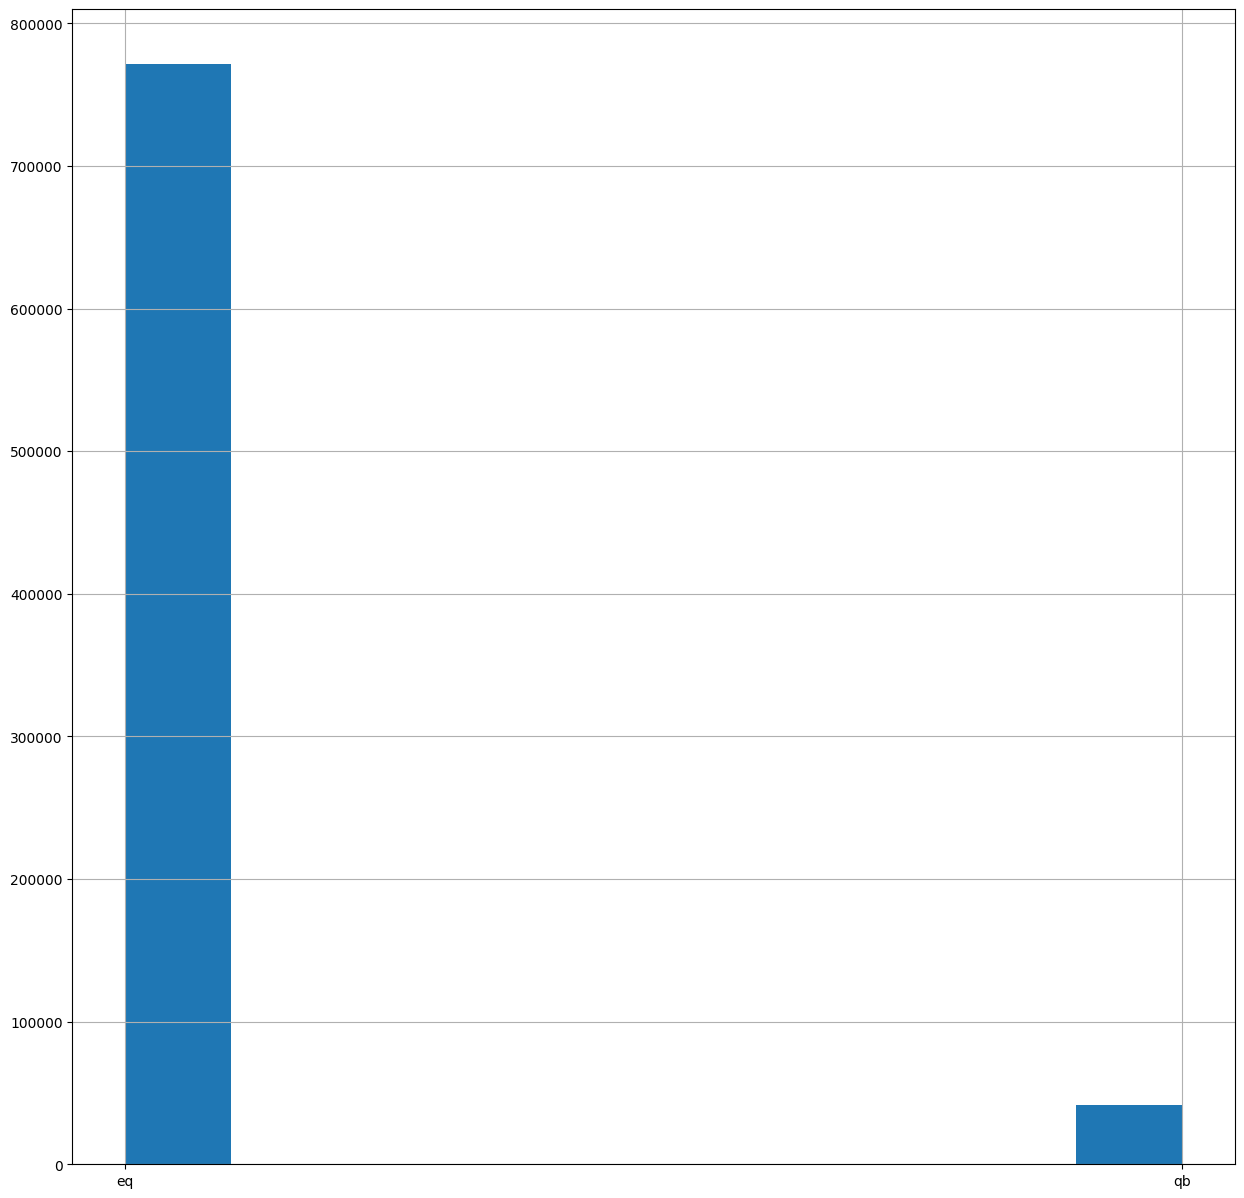

In [169]:
df['ET'].hist()

Check stationarity (seasonality) - expecting to see none

https://builtin.com/data-science/time-series-python

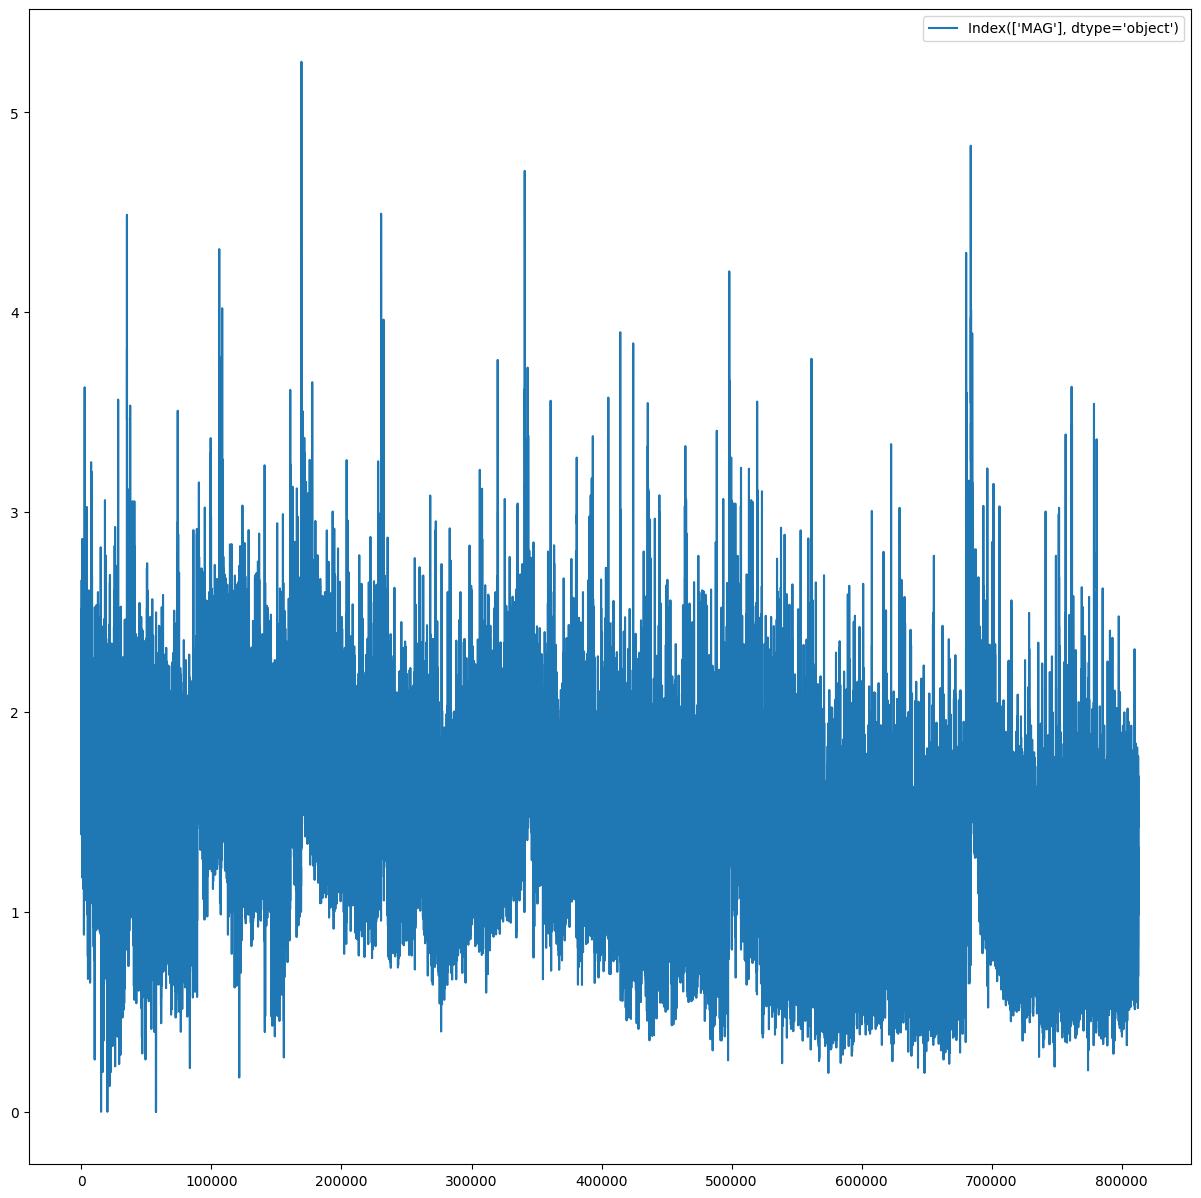

In [174]:
rolling_mean = df2.rolling(7).mean()
rolling_std = df2.rolling(7).std()
plt.plot(rolling_mean, label=rolling_mean.columns)
plt.legend()


In [139]:
sns.lineplot(df2)
print("Done")

KeyboardInterrupt: 

Correlation

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import rcParams

correlations = df.corr()

#figure size in inches
rcParams['figure.figsize'] = 15,15 #letter-size, in inches

#use a diverging colormap
sn.heatmap(correlations, cmap="vlag", center=0, square=True, linewidths=1)

plt.show()
#plt.savefig('correlationMatrix3.png') #saves to disk
plt.close()